In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.metrics import silhouette_score

In [2]:
#Reading from CSV File and Storing in Dataframe
X = pd.read_csv('../../Dataset/x_train_all.csv')
y = pd.read_csv('../../Dataset/y_train_all.csv')

In [3]:
#Printing the shapes of the training
print("========================================")
print("Shape of X is  :", X.shape)
print("Shape of y is  :", y.shape)
print("========================================")

Shape of X is  : (9690, 2304)
Shape of y is  : (9690, 1)


In [4]:
#Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
#Printing the shapes of the training
print("========================================")
print("=   Shape to train and test Dataset    =")
print("========================================")
print("= Shape of X_train is  :", X_train.shape)
print("= Shape of y_train is  :", y_train.shape)
print("= Shape of X_test is   :", X_test.shape)
print("= Shape of y_test is   :", y_test.shape)
print("========================================")

=   Shape to train and test Dataset    =
= Shape of X_train is  : (7752, 2304)
= Shape of y_train is  : (7752, 1)
= Shape of X_test is   : (1938, 2304)
= Shape of y_test is   : (1938, 1)


In [6]:
#Scaling the data
X_train = X_train / 255
X_test = X_test / 255

In [7]:
#code to run kmeans
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
labels = kmeans.labels_
clusters = kmeans.fit_predict(X_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [8]:
#print the elements in a cluster
for i in range(10):
    print("Cluster {} contains {} samples".format(i, np.sum(kmeans.labels_ == i)))

Cluster 0 contains 903 samples
Cluster 1 contains 1744 samples
Cluster 2 contains 366 samples
Cluster 3 contains 1019 samples
Cluster 4 contains 267 samples
Cluster 5 contains 614 samples
Cluster 6 contains 801 samples
Cluster 7 contains 371 samples
Cluster 8 contains 1473 samples
Cluster 9 contains 194 samples


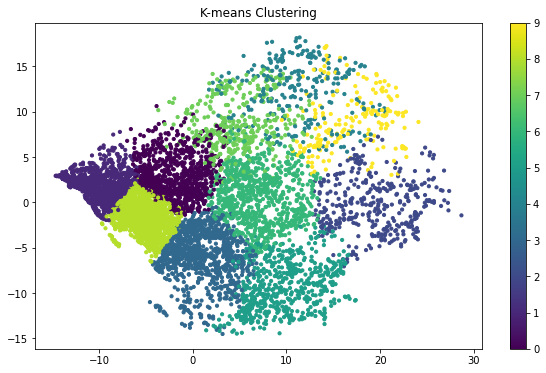

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=10)
plt.title('K-means Clustering')
plt.colorbar()
plt.show()

In [10]:
silhouette_avg = silhouette_score(X_train, labels)
print("========================================")
print(f"Silhouette Score: {silhouette_avg}")
print("========================================")

Silhouette Score: 0.15376055716034978


In [11]:
#Oversampling the data
smote = SMOTE(sampling_strategy='auto', random_state=42)
# Perform SMOTE oversampling on the data
X_oversampled, y_oversampled = smote.fit_resample(X_train, y_train)

In [12]:
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_oversampled)
y_pred = kmeans.predict(X_test)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_oversampled)
labels = kmeans.labels_
clusters = kmeans.fit_predict(X_oversampled)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster 0 contains 5077 samples
Cluster 1 contains 1642 samples
Cluster 2 contains 3065 samples
Cluster 3 contains 857 samples
Cluster 4 contains 282 samples
Cluster 5 contains 692 samples
Cluster 6 contains 2579 samples
Cluster 7 contains 626 samples
Cluster 8 contains 739 samples
Cluster 9 contains 2371 samples


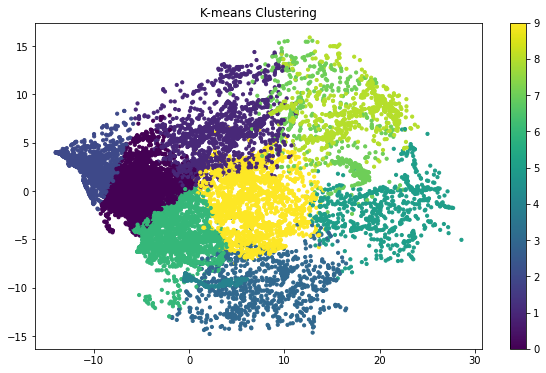

In [13]:
#print the elements in a cluster
for i in range(10):
    print("Cluster {} contains {} samples".format(i, np.sum(kmeans.labels_ == i)))
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=10)
plt.title('K-means Clustering')
plt.colorbar()
plt.show()

In [14]:
silhouette_avg = silhouette_score(X_oversampled, labels)
print("========================================")
print(f"Silhouette Score: {silhouette_avg}")
print("========================================")

Silhouette Score: 0.16439164973085085
